In [1]:
import sys
sys.path.append('..')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sfp_nsdsyn import *
import warnings
import itertools
warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

In [2]:
output_dir='/Volumes/server/Projects/sfp_nsd/derivatives'
bd_dir = '/Volumes/server/Projects/sfp_nsd/derivatives_old'

results_dir = os.path.join(output_dir, 'sfp_model', 'results_2D', 'nsdsyn')
fig_dir = '/Volumes/server/Projects/sfp_nsd/derivatives/figures'
lr = 0.0005
max_epoch = 30000
dset='nsdsyn'
roi_list = ['V1','V2','V3']
vsc='pRFsize'
subj_list = [utils.sub_number_to_string(sn, 'nsdsyn') for sn in np.arange(1,9)]
args = ['lr','eph','sub','roi','dset']
broderick_sn_list = [1, 6, 7, 45, 46, 62, 64, 81, 95, 114, 115, 121]
broderick_subj_list = [utils.sub_number_to_string(i, 'broderick') for i in broderick_sn_list]

# Import Broderick dataset
## import model parameters

In [3]:
#TODO: same format for broderick files
broderick_file_list = []
bd_file_list = []
for subj in broderick_subj_list:
    f = os.path.join(bd_dir,
                     'sfp_model',
                     'results_2D',
                     f'model_history_dset-broderick_bts-median_full_ver-True_sub-{subj}_lr-0.0005_eph-30000_V1.h5')
    bd_file_list.append(f)
bd_args = ['dset','sub']
bd_params = utils.load_history_files(bd_file_list, *bd_args)
bd_params['vroinames'] = 'V1'
bd_params = bd_params.query('epoch == 29999')

## import precisions for each subject

In [4]:
bd_file_list = []
for bd_subj in broderick_subj_list:
    f = os.path.join(output_dir, 'dataframes', 'broderick', 'precision', f'precision-v_dset-broderick_sub-{bd_subj}_roi-V1_vs-pRFsize.csv')
    bd_file_list.append(f)
bd_precision = utils.load_history_files(bd_file_list)
bd_precision_s = bd_precision.groupby(['sub','vroinames'], group_keys=False).mean().reset_index()

final_bd_df = bd_params.merge(bd_precision_s[['sub','vroinames','sigma_v_squared']], on=['sub','vroinames'])
final_bd_df.head()

,epoch,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2,dset,sub,vroinames,sigma_v_squared
0,29999,2.984196,0.071027,0.400024,0.009960,-0.023560,0.005086,0.004069,0.031463,-0.007001,broderick,wlsubj001,V1,0.096439
1,29999,2.207649,0.192008,0.318536,0.072753,-0.027144,0.036718,-0.007561,0.047686,0.008027,broderick,wlsubj006,V1,0.091271
2,29999,1.859566,0.123812,0.328673,0.060503,-0.059433,0.160803,-0.005691,0.033455,0.018466,broderick,wlsubj007,V1,0.263597
3,29999,1.839831,0.137402,0.193707,0.066500,-0.050486,0.016282,-0.014123,0.080934,-0.027548,broderick,wlsubj045,V1,0.186538
4,29999,2.236669,0.101690,0.221754,0.039310,-0.023616,0.083696,0.022005,0.039015,-0.012657,broderick,wlsubj046,V1,0.187891


# Import NSD dataset
## import model parameters

In [5]:
pt_file_list = []
for subj, roi in itertools.product(subj_list, ['V1','V2','V3']):
    file_name = os.path.join(output_dir,
                             'sfp_model',
                             'results_2D',
                             'nsdsyn',
                             f'model-params_lr-{lr}_eph-{max_epoch}_dset-{dset}_sub-{subj}_roi-{roi}_vs-{vsc}.pt')
    pt_file_list.append(os.path.join(results_dir, file_name))
nsd_params = model.load_all_models(pt_file_list, *args)

## import precisions for each subject

In [6]:
pt_file_list = []
for subj, roi in itertools.product(subj_list, ['V1','V2','V3']):
    f = os.path.join(output_dir, 'dataframes', dset, 'precision', f'precision-v_dset-{dset}_sub-{subj}_roi-{roi}_vs-pRFsize.csv')
    pt_file_list.append(f)
nsd_precision_v = utils.load_history_files(pt_file_list)
nsd_precision_s = nsd_precision_v.groupby(['sub','vroinames']).mean().reset_index()
final_nsd_df = nsd_params.merge(nsd_precision_s[['sub','vroinames','sigma_v_squared']], on=['sub','vroinames'])
final_nsd_df.head()

,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2,lr_rate,max_epoch,sub,vroinames,dset,sigma_v_squared
0,2.490021,0.139594,0.217478,0.022201,-0.021813,-0.274858,-0.012191,0.023888,-0.006918,0.0005,30000,subj01,V1,nsdsyn,0.745111
1,5.543962,0.230673,0.313956,0.027977,-0.002200,-1.300301,0.388318,-0.001618,-0.003984,0.0005,30000,subj01,V2,nsdsyn,0.645804
2,4.952771,0.175571,0.289297,-0.024290,-0.021548,-1.176202,0.330713,0.042333,-0.006572,0.0005,30000,subj01,V3,nsdsyn,0.385100
3,2.009928,0.124187,0.090198,0.101903,-0.053708,-0.001964,-0.054230,0.006940,0.006901,0.0005,30000,subj02,V1,nsdsyn,1.318375
4,3.414492,0.312690,0.004236,-0.175029,-0.189858,-0.184870,0.009310,-0.012834,-0.059446,0.0005,30000,subj02,V2,nsdsyn,1.133998


# Combine two datasets

In [7]:
final_df = final_bd_df.append(final_nsd_df)
final_df['precision'] = 1 / final_df['sigma_v_squared']

def dset_roi(row):
    if row.dset == "broderick":
        new_col = 'V1 Broderick'
    else:
        new_col = f'{row.vroinames} NSD'
    return new_col
final_df['dset_roi'] = final_df.apply(dset_roi, axis=1)


# Plot model parameter comparison figure

In [8]:
broderick_color = utils.get_dset_colors(['broderick'])
roi_colors = utils.get_colors('roi', ['V1','V2','V3'])
all_colors = broderick_color + roi_colors

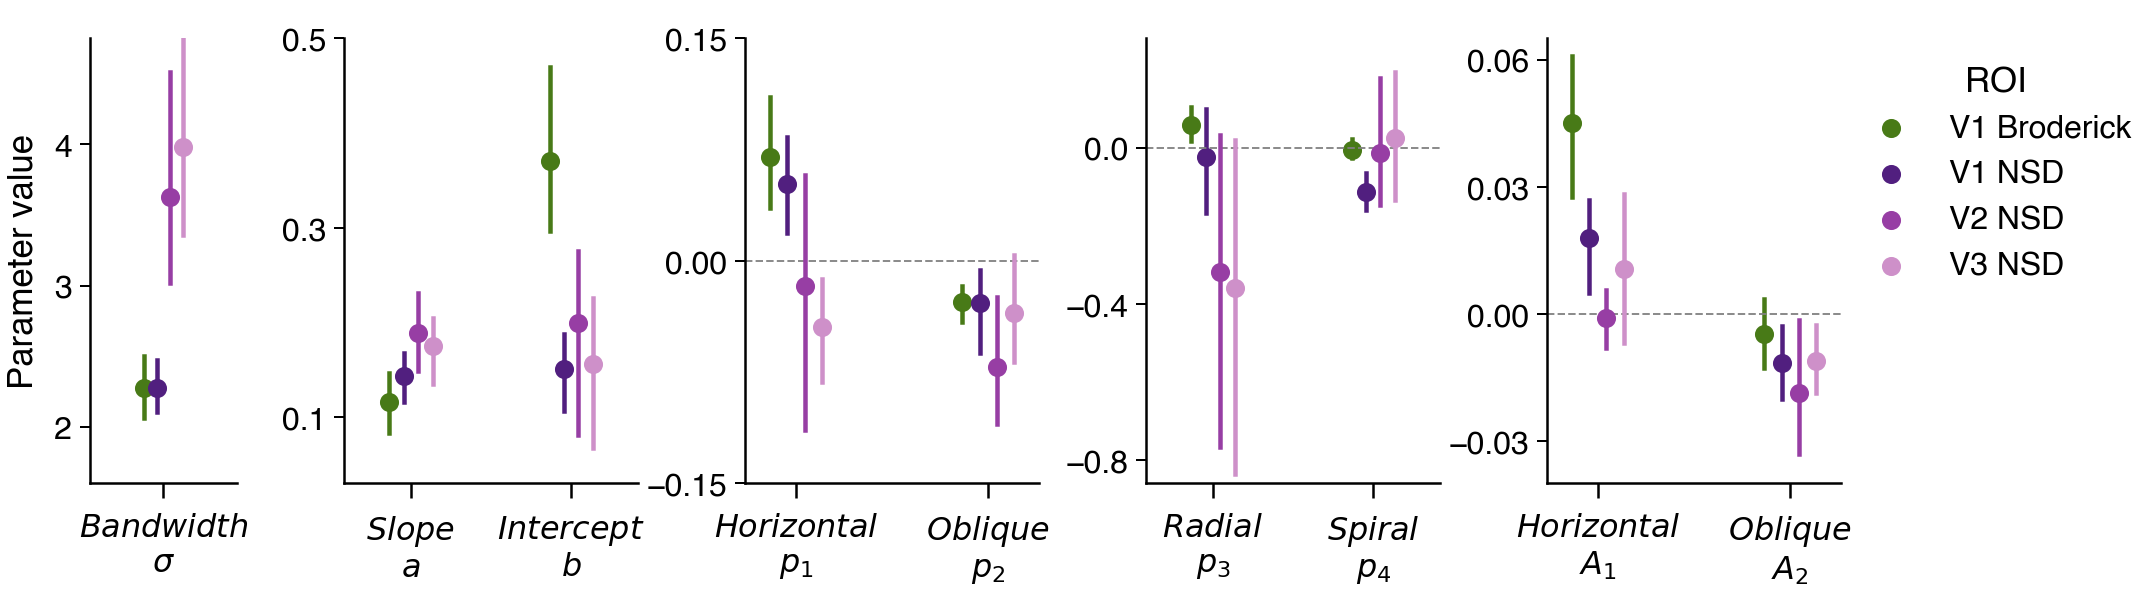

In [9]:
params_list = ['sigma', 'slope', 'intercept', 'p_1', 'p_2', 'p_3', 'p_4', 'A_1', 'A_2']
group = [1,2,2,3,3,4,4,5,5]

param_comparison_fig = f'fig-params_lr-{lr}_eph-{max_epoch}_dset-all_sub-all_roi-V1V2V3_vs-{vsc}.png'
ylim_list = [(1.6, 4.75), (0.03, 0.5), (-0.15, 0.15),(-0.86, 0.28), (-0.04, 0.065)]
yticks_list = [[2, 3, 4], [0.1, 0.3, 0.5], [-0.15,0,0.15], [-0.8, -0.4,0], [-0.03,0,0.03,0.06]]

grid = vis2D.plot_precision_weighted_avg_parameters(final_df,
                                                    params_list,
                                                    group,
                                                    hue='dset_roi',
                                                    hue_order=['V1 Broderick',
                                                               'V1 NSD','V2 NSD','V3 NSD'],
                                                    lgd_title='ROI',
                                                    height=9,
                                                    pal=all_colors,
                                                    dodge=0.27,
                                                    dot_scale=1.3,
                                                    ylim_list=ylim_list,
                                                    ytick_list=yticks_list,
                                                    save_path=os.path.join(fig_dir,
                                                                           'sfp_model',
                                                                           'results_2D',
                                                                           'dset_comparison',
                                                                           param_comparison_fig))

,epoch,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2,dset,sub,vroinames,sigma_v_squared,lr_rate,max_epoch,precision,dset_roi
0,29999.0,2.984196,0.071027,0.400024,0.009960,-0.023560,0.005086,0.004069,0.031463,-0.007001,broderick,wlsubj001,V1,0.096439,NaN,NaN,10.369273,V1 Broderick
1,29999.0,2.207649,0.192008,0.318536,0.072753,-0.027144,0.036718,-0.007561,0.047686,0.008027,broderick,wlsubj006,V1,0.091271,NaN,NaN,10.956371,V1 Broderick
2,29999.0,1.859566,0.123812,0.328673,0.060503,-0.059433,0.160803,-0.005691,0.033455,0.018466,broderick,wlsubj007,V1,0.263597,NaN,NaN,3.793674,V1 Broderick
3,29999.0,1.839831,0.137402,0.193707,0.066500,-0.050486,0.016282,-0.014123,0.080934,-0.027548,broderick,wlsubj045,V1,0.186538,NaN,NaN,5.360829,V1 Broderick
4,29999.0,2.236669,0.101690,0.221754,0.039310,-0.023616,0.083696,0.022005,0.039015,-0.012657,broderick,wlsubj046,V1,0.187891,NaN,NaN,5.322228,V1 Broderick


In [14]:

def weighted_mean(x, **kws):
    """store weights as imaginery number"""
    return np.sum(np.real(x) * np.imag(x)) / np.sum(np.imag(x))


In [16]:
final_nsd_df['precision'] = 1 / final_nsd_df['sigma_v_squared']

final_nsd_df['slope_and_weights'] = [v + w * 1j for v, w in zip(final_nsd_df['slope'], final_nsd_df['precision'])]
final_nsd_df['intercept_and_weights'] = [v + w * 1j for v, w in zip(final_nsd_df['intercept'], final_nsd_df['precision'])]

final_nsd_df.groupby(['vroinames']).agg(weighted_mean)

/Users/jh7685/opt/miniconda3/envs/sfp/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in float_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jh7685/opt/miniconda3/envs/sfp/lib/python3.7/site-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)
/Users/jh7685/opt/miniconda3/envs/sfp/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2,sigma_v_squared,precision,slope_and_weights,intercept_and_weights
vroinames,,,,,,,,,,,,,
V1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143683,0.150899
V2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.188906,0.199878
V3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.175543,0.155972


In [18]:
final_nsd_df.groupby(['vroinames']).mean()

/Users/jh7685/opt/miniconda3/envs/sfp/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2,sigma_v_squared,precision
vroinames,,,,,,,,,,,
V1,2.320913,0.137068,0.135569,0.049541,-0.035001,-0.019830,-0.124190,0.014834,-0.010455,1.515671,0.781060
V2,3.504625,0.183516,0.159194,-0.039870,-0.068292,-0.276022,-0.037000,-0.001662,-0.015043,1.178995,0.984679
V3,4.017781,0.163156,0.135101,-0.040672,-0.025648,-0.335596,0.007288,0.007861,-0.009228,0.876988,1.439641
